In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv(r"C:\Users\user\Desktop\Zeru\wallet_score_output.csv")

In [5]:
data['predicted_score']=np.round_(data['predicted_score'],1)

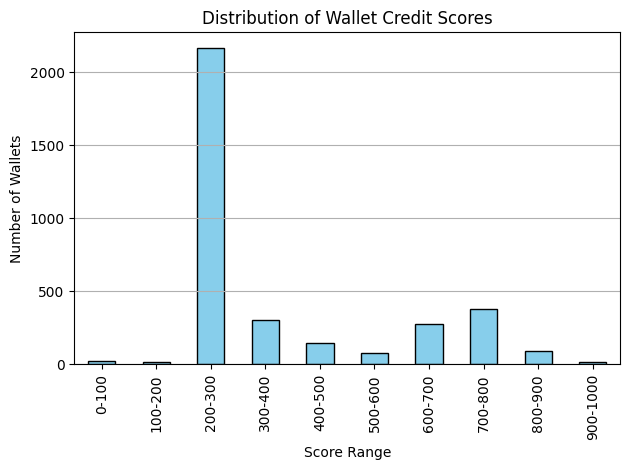

In [6]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500',
          '500-600', '600-700', '700-800', '800-900', '900-1000']

data['score_range'] = pd.cut(data['predicted_score'], bins=bins, labels=labels, right=True)
score_distribution = data['score_range'].value_counts().sort_index()

# Plot score distribution
score_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Wallet Credit Scores")
plt.xlabel("Score Range")
plt.ylabel("Number of Wallets")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("score_distribution.png")
plt.show()


In [7]:
import joblib
dataset=joblib.load("wallet_features.pkl")

In [9]:
# Merge predicted scores into wallet_features
dataset = pd.merge(dataset, data, on='userWallet', how='left')
dataset['score_range'] = pd.cut(dataset['predicted_score'], bins=bins, labels=labels)


In [11]:
behavior_by_range = dataset.groupby('score_range').agg({
    'num_borrows': 'mean',
    'num_deposits': 'mean',
    'repaid_percentage': 'mean',
    'liquidation_ratio': 'mean',
    'active_days': 'mean',
    'days_since_last_tx': 'mean'
}).round(2)

print(behavior_by_range)
behavior_by_range.to_csv("behavior_by_score_range.csv")


             num_borrows  num_deposits  repaid_percentage  liquidation_ratio  \
score_range                                                                    
0-100               2.45          2.82               0.02               1.39   
100-200             8.44         10.31               0.03               0.32   
200-300             1.43          4.56               0.00               0.00   
300-400             8.20         21.04               0.06               0.01   
400-500            13.94         25.94               0.28               0.03   
500-600            18.07         29.48               0.71               0.07   
600-700            10.66         22.19               1.03               0.01   
700-800             9.89         18.40               1.00               0.00   
800-900            11.22         20.83               1.05               0.01   
900-1000            7.35          9.71               1.76               0.00   

             active_days  days_since_la

C:\Users\user\AppData\Local\Temp\ipykernel_12536\385558234.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  behavior_by_range = dataset.groupby('score_range').agg({
